In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('Crop_dataset.csv')

In [155]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [156]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [158]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [159]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [160]:
df.duplicated().sum()

0

In [161]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [162]:
df.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Label"]

In [163]:
df.sample()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
1541,21,137,196,23.61192,91.702938,5.812782,123.590082,apple


<Axes: xlabel='count', ylabel='Label'>

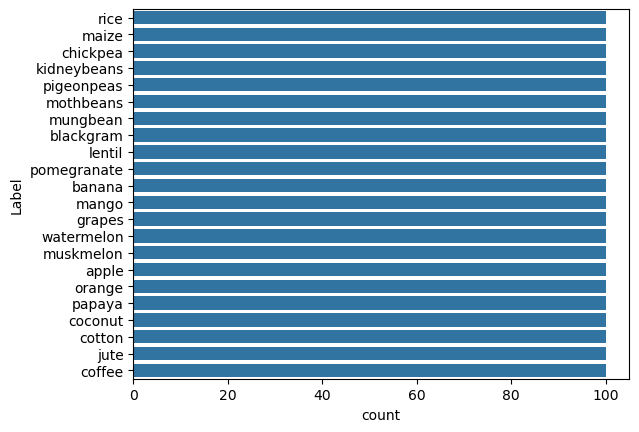

In [164]:
sns.countplot(y=df['Label'] ,data=df)

In [165]:
num = df.select_dtypes(exclude='object').columns

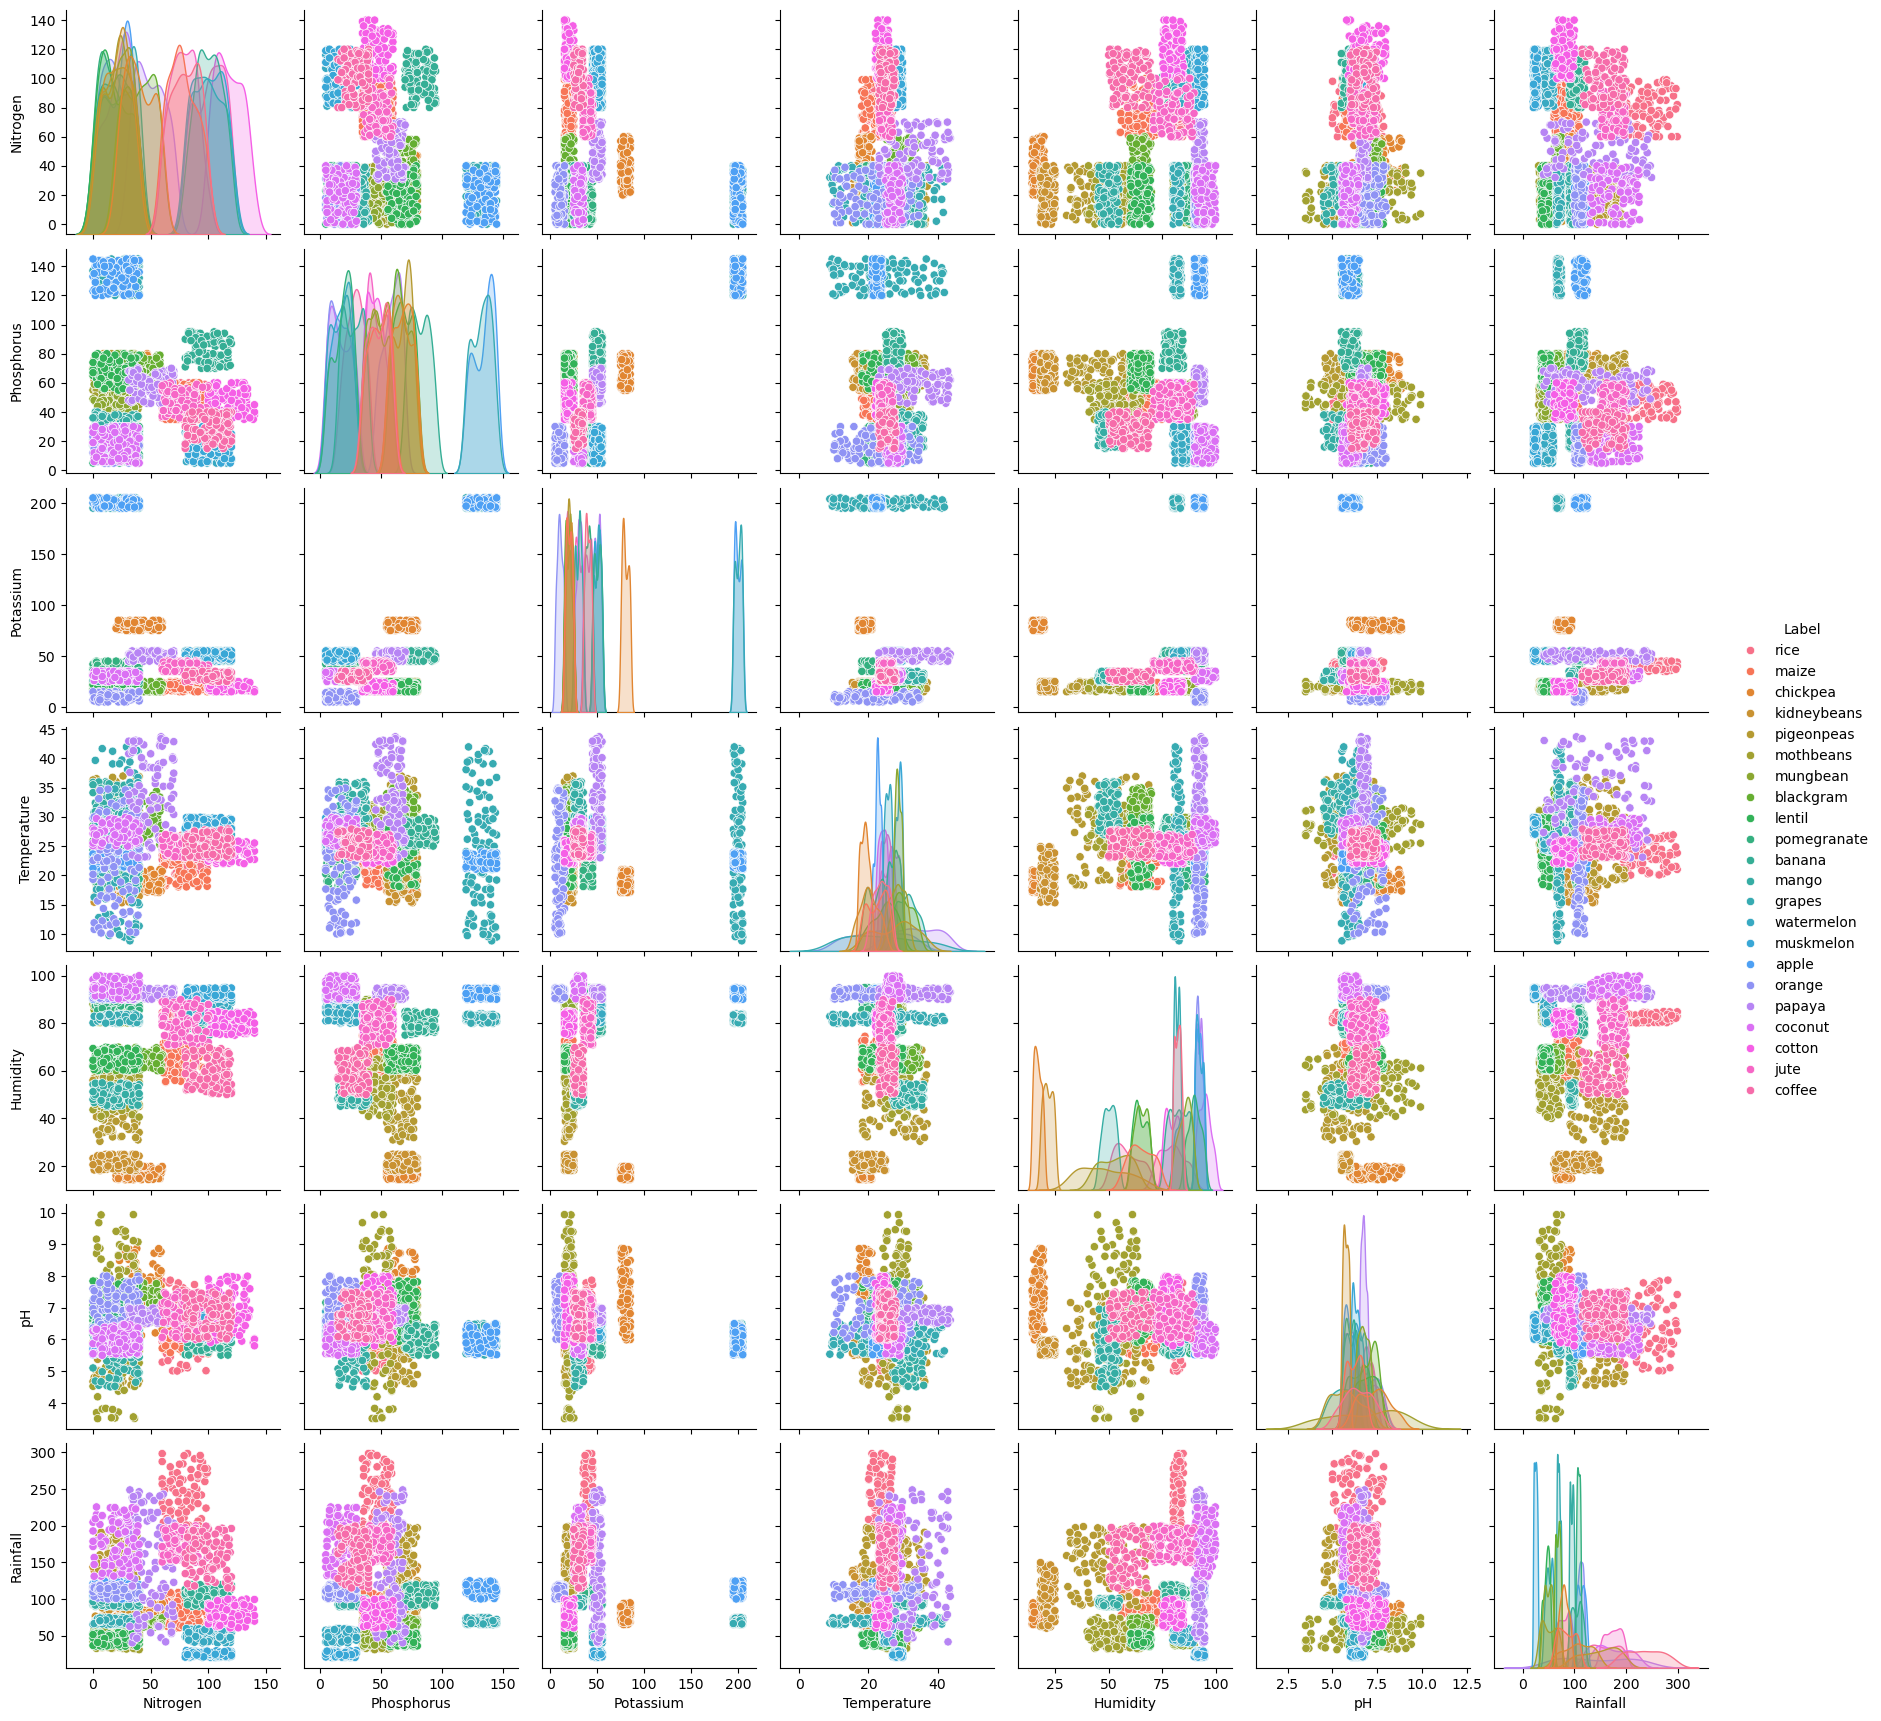

In [166]:
sns.pairplot(df,hue='Label')

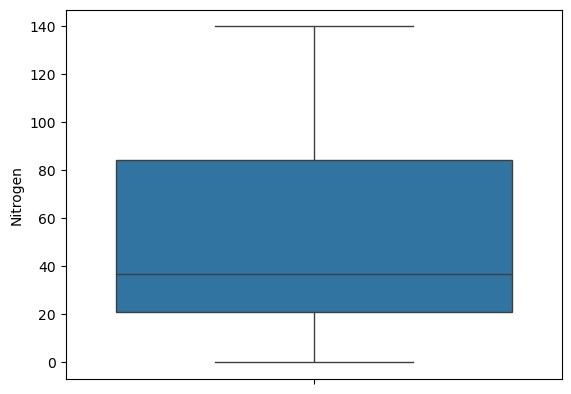

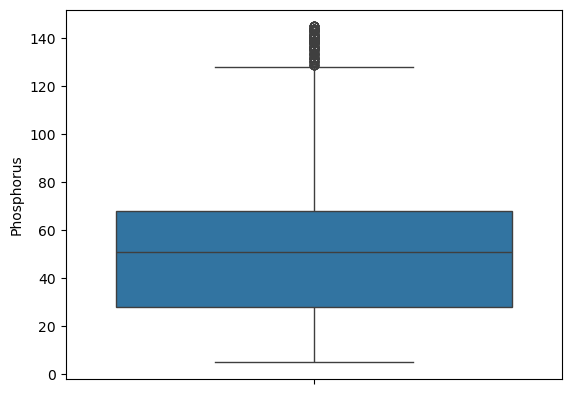

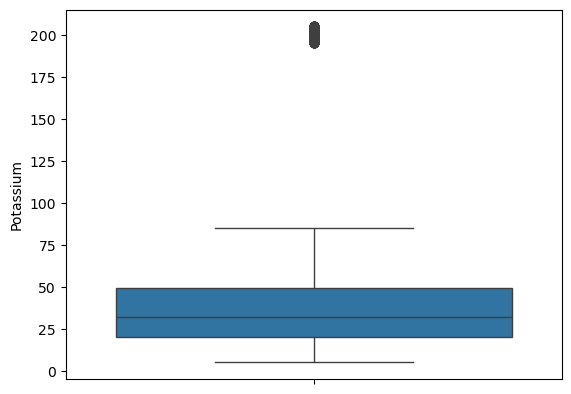

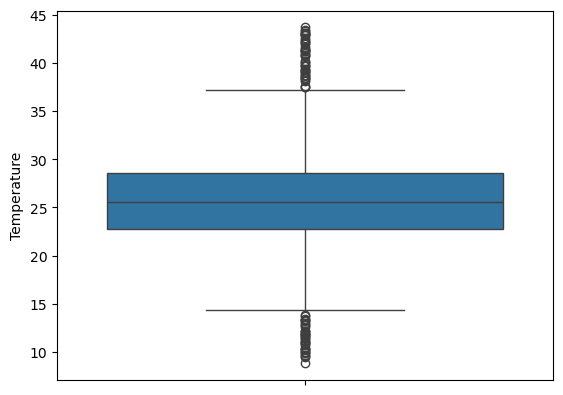

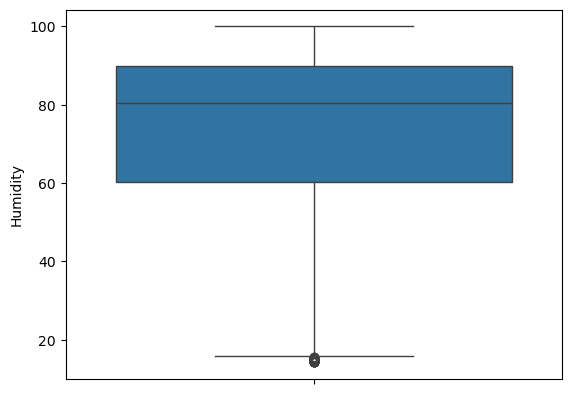

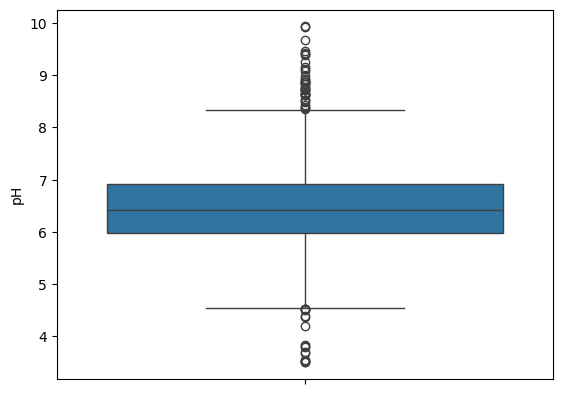

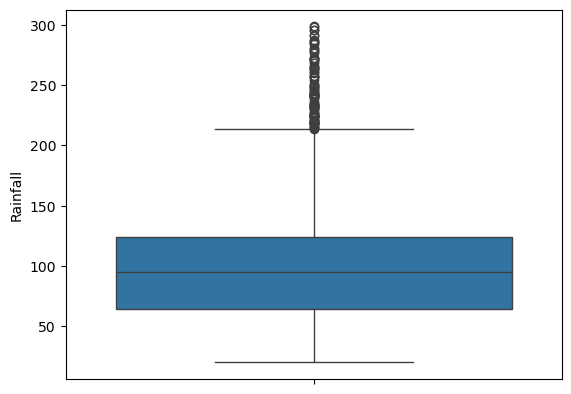

In [167]:
for i in num:
    sns.boxplot(y=df[i],data=df)
    plt.show()

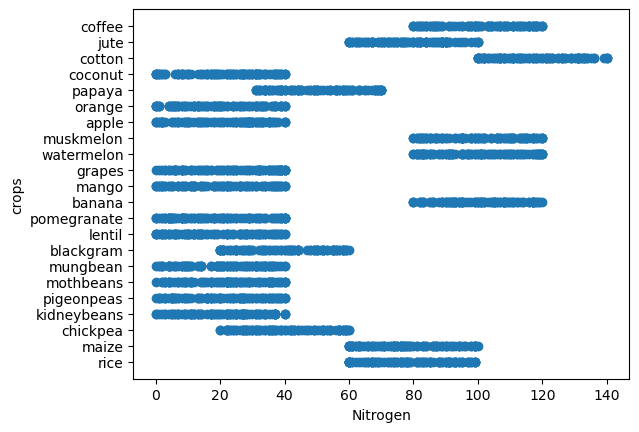

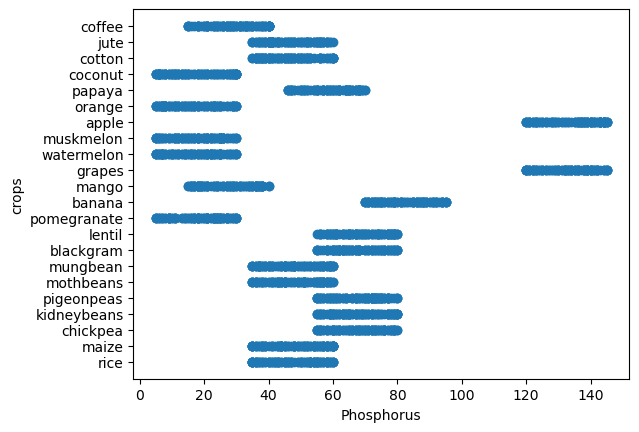

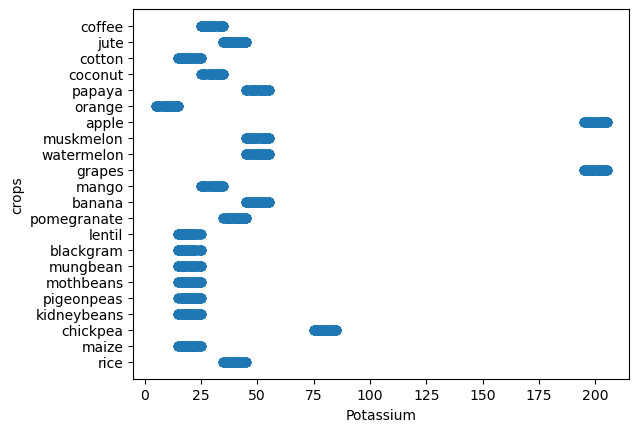

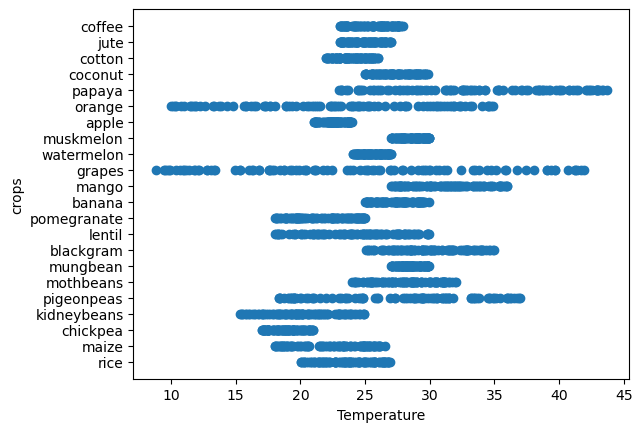

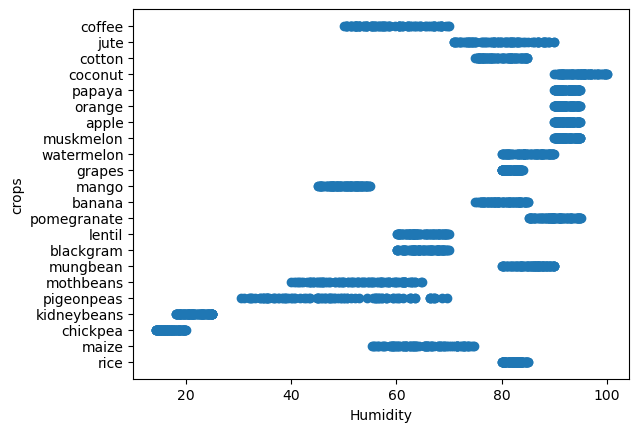

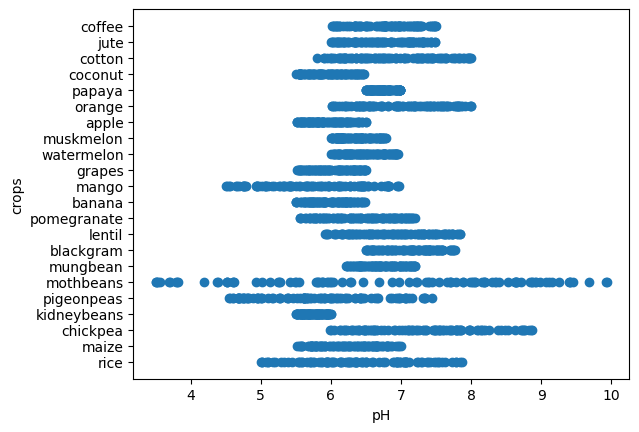

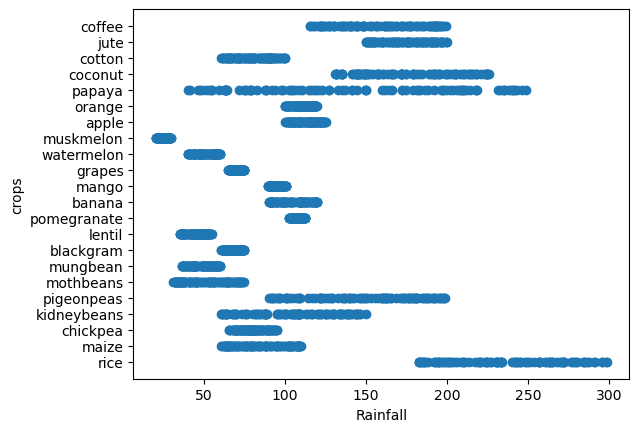

In [168]:
for i in num:
    plt.scatter(df[i],df.Label)
    plt.xlabel(i)
    plt.ylabel('crops')
    plt.show()

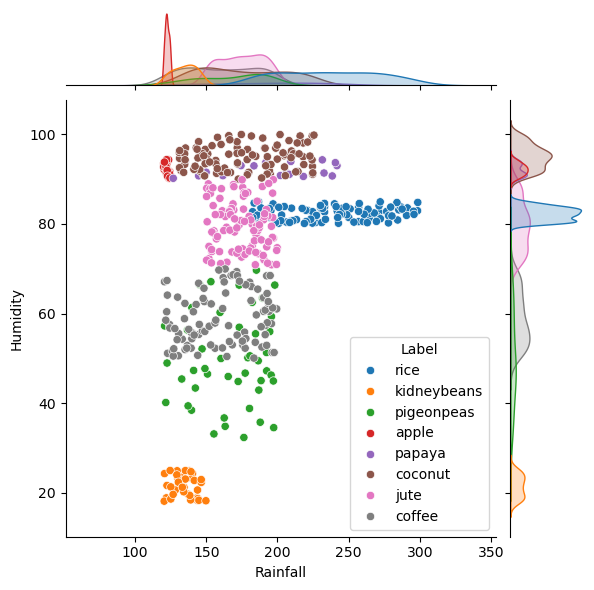

In [169]:
sns.jointplot(x="Rainfall",y="Humidity",data=df[(df['Temperature']<30) & (df['Rainfall']>120)],hue="Label")

<Axes: >

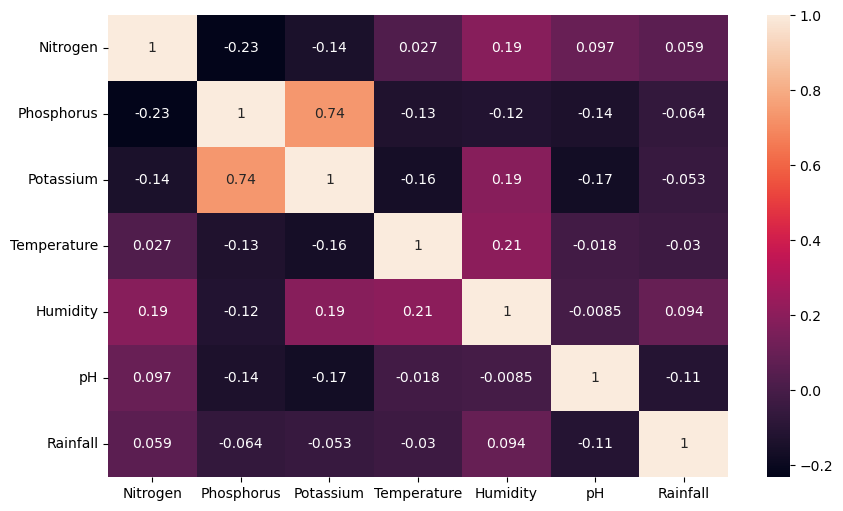

In [170]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[num].corr(),annot=True)

In [171]:
X=df.drop(columns='Label')
y=df['Label']

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [174]:
from sklearn.model_selection import cross_val_score
avg=cross_val_score(dt_classifier,x_train,y_train,cv=5)
np.average(avg)

0.9869318181818182

In [175]:
dt_classifier.score(x_test,y_test)

0.9840909090909091

In [176]:
pred_dt = dt_classifier.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9840909090909091

In [178]:
from sklearn.metrics import classification_report 
dt_report=classification_report(y_test,pred_dt)
print(dt_report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [180]:
from sklearn.model_selection import cross_val_score
avg=cross_val_score(rf_classifier,x_train,y_train)
np.average(avg)

0.9943181818181819

In [181]:
rf_classifier.score(x_test,y_test)

0.9931818181818182

In [182]:
ypred = rf_classifier.predict(x_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [183]:
from sklearn.metrics import classification_report 
rf_report=classification_report(y_test,ypred)

In [184]:
print(rf_report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [185]:
rf_classifier.predict([[87,65,83,15.293156,11.876543,8.38203757,223.765438]])

c:\Users\purushoth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['chickpea'], dtype=object)

In [192]:
import pickle 
with open('soil_classification.pkl','wb') as f:
    pickle.dump(rf_classifier,f)

In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [188]:
from sklearn.model_selection import cross_val_score
avg=cross_val_score(knn_classifier,x_train,y_train,)
np.average(avg)

0.9806818181818182

In [189]:
knn_classifier.score(x_test,y_test)

0.9704545454545455

In [190]:
y_pred = knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9704545454545455

In [191]:
knn_report=classification_report(y_test,y_pred)
print(knn_report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    